# **Google Play Store Dataset**
_by Joey Tuason_

11-May (*Second Commit*)

Revised notebook to included new charts and insights for the storytelling deck.<br>
Please expect a third commit since the objective of the notebook is to layout all possible plots that can be used in the storytelling deck.

The original notebook [here](https://github.com/joeytuason83/joeytuason83.github.io/blob/660764a43c0be149301c7ebed181338e329939c8/Data%20Visualization/Individual%20Dataset-PythonicVizes_0507.ipynb).

08-May (*First Commit*)

[Source 1, 3 parts in gzip](https://github.com/gauthamp10/Google-Playstore-Dataset)<br>
[Source 2, in csv](https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps)

We will look at apps with ratings between 1 to 5 stars. To simplify the dataset loading, we will use Source 2 where the dataset is already consolidated.

## Problem Statement

What key notes can we see by observing **ratings** in order to develop an app with likely **high** rating?

## Load Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Load the Google Playstore File

In [2]:
df = pd.read_csv('Google-Play-Store.csv')

In [3]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [4]:
df.shape

(2312944, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [6]:
col_values = ['Rating','Rating Count','Minimum Installs','Maximum Installs','Price']

In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # remove scientific notation
df.loc[:,col_values].describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2290061.00,2290061.00,2312837.00,2312944.00,2312944.00
mean,2.20,2864.84,183445.21,320201.71,0.10
std,2.11,212162.57,15131439.06,23554954.89,2.63
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,50.00,84.00,0.00
50%,2.90,6.00,500.00,695.00,0.00
75%,4.30,42.00,5000.00,7354.00,0.00
max,5.00,138557570.00,10000000000.00,12057627016.00,400.00


In [8]:
df.notnull().sum()

App Name             2312942
App Id               2312944
Category             2312944
Rating               2290061
Rating Count         2290061
Installs             2312837
Minimum Installs     2312837
Maximum Installs     2312944
Free                 2312944
Price                2312944
Currency             2312809
Size                 2312748
Minimum Android      2306414
Developer Id         2312911
Developer Website    1552109
Developer Email      2312913
Released             2241891
Last Updated         2312944
Content Rating       2312944
Privacy Policy       1891991
Ad Supported         2312944
In App Purchases     2312944
Editors Choice       2312944
Scraped Time         2312944
dtype: int64

In [9]:
df.isnull().sum()

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [10]:
df.nunique()

App Name             2177944
App Id               2312944
Category                  48
Rating                    42
Rating Count           38482
Installs                  22
Minimum Installs          22
Maximum Installs      251563
Free                       2
Price                   1063
Currency                  15
Size                    1657
Minimum Android          154
Developer Id          758371
Developer Website     810440
Developer Email       950456
Released                4158
Last Updated            3918
Content Rating             6
Privacy Policy        977743
Ad Supported               2
In App Purchases           2
Editors Choice             2
Scraped Time           67374
dtype: int64

While we have a `Currency` column, it is not indicative of where the transaction was made. Rather this is already a converted amount. This is why we only see a few non-USD transactions. Unfortunately, because of this we are not able to use this for our study.

In [11]:
df[df['Currency'] != 'USD']

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
19,Contemporary Love Wallpaper HD,com.felingdev.lowalpaper,Books & Reference,0.00,0.00,1+,1.00,2,True,0.00,...,NaN,farukabdillah4@gmail.com,"Dec 26, 2020","Mar 23, 2021",Mature 17+,https://docs.google.com/document/d/1oK4CCJ6gbq...,True,False,False,2021-06-15 20:19:36
32,Photo Brightness Editor - Image Brighten App,image.photo.brightness.editor,Photography,2.50,21.00,"5,000+",5000.00,8984,True,0.00,...,https://spobam.com,bajiodunamis@gmail.com,"Nov 13, 2020","Nov 14, 2020",Everyone,https://spobam.com/image-brightness-privacy-po...,True,False,False,2021-06-15 20:19:37
67,RACE ACADEMY,co.davos.snqkw,Education,0.00,0.00,100+,100.00,186,True,0.00,...,NaN,support@classplus.co,"Jan 9, 2021","May 18, 2021",Everyone,https://bit.ly/2YDTip0,False,False,False,2021-06-15 20:19:39
181,Ash Kreations 360,com.ashkreations,Entertainment,0.00,0.00,500+,500.00,670,True,0.00,...,NaN,ashcreationuniverse@gmail.com,"Dec 2, 2020","Dec 20, 2020",Everyone,https://ashkreationsbin.blogspot.com/p/privacy...,True,False,False,2021-06-15 20:19:46
191,Wood Canyon Store,com.woodcanyonstore.app,Shopping,0.00,0.00,1+,1.00,2,True,0.00,...,http://www.woodcanyonstore.com/,woodcanyonstore@gmail.com,"May 7, 2021","May 07, 2021",Everyone,http://www.woodcanyonstore.com/privacy-policy/,False,False,False,2021-06-15 20:19:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161180,DEEMO II,com.rayark.deemo2,Music,NaN,NaN,NaN,NaN,0,False,0.00,...,https://deemo.com/deemo2/,service@rayark.com,NaN,"May 04, 2020",Everyone,https://www.terms.rayark.com/terms-en,False,False,False,2021-06-16 10:46:48
2170210,Lendor - Share & Rent Anything!,sg.lendor,Shopping,NaN,NaN,NaN,NaN,5178,False,0.00,...,https://lendor.sg,contact@lendor.co,"Jul 18, 2018","Jun 04, 2021",Everyone,https://lendor.sg/terms-condition/privacy-policy,False,False,False,2021-06-16 10:54:31
2205663,Local 24h Motorista,com.movi24h.motorista,Auto & Vehicles,NaN,NaN,NaN,NaN,3238,False,0.00,...,http://www.local24h.com,app@movi24h.com,"May 4, 2018","Sep 16, 2020",Everyone,http://www.movi24h.com,False,False,False,2021-06-16 11:25:35
2212570,Mitrasphere,com.jetsynthesys.mitrasphere,Role Playing,NaN,NaN,NaN,NaN,13653,False,0.00,...,NaN,mitrasphere@crunchyrollgames.com,NaN,"Jun 03, 2021",Teen,https://www.crunchyroll.com/games/privacy/inde...,True,False,False,2021-06-16 11:31:36


### Data Clean

All data changes and possible additional columns for visualizations should go here.

Remove ratings which as `NA`.<br>
Remove ratings which are `0`.

In [12]:
df.dropna(subset = ['Rating'], inplace=True) # Remove null ratings
df.shape

(2290061, 24)

In [13]:
df = df[df.Rating > 0] # remove zero rated apps
df.shape

(1230299, 24)

Define the new column `Free or Paid` based on the values of the `Free` column (boolean).

In [14]:
df['Free or Paid'] = 'Paid'
df.loc[df['Free'] == 1,'Free or Paid'] = 'Free'

In [15]:
df.reset_index(inplace=True) #reset index to avoid error in loop
df

,index,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,...,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Free or Paid
0,1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.40,64.00,"5,000+",5000.00,7662,True,...,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35,Free
1,3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.00,5.00,10+,10.00,19,True,...,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35,Free
2,6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.50,12.00,"1,000+",1000.00,2567,True,...,aitomgharfatimezzahra@gmail.com,"Sep 23, 2019","Sep 27, 2019",Everyone,https://sites.google.com/view/unlimited4gdatap...,True,False,False,2021-06-15 20:19:35,Free
3,7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.00,39.00,500+,500.00,702,True,...,elementuser03@gmail.com,"Jun 21, 2019","Jun 21, 2019",Everyone,https://www.freeprivacypolicy.com/privacy/view...,False,False,False,2021-06-15 20:19:35,Free
4,9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.70,820.00,"50,000+",50000.00,62433,True,...,trendyteme.888@gmail.com,"Sep 22, 2019","Oct 07, 2020",Everyone,http://bit.ly/EmojiThemePro,True,False,False,2021-06-15 20:19:35,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230294,2312933,Caustic Editor for VolcaSample,com.singlecellsoftware.kvsampler,Music & Audio,4.00,344.00,"500,000+",500000.00,814548,True,...,causticapp@gmail.com,"Dec 11, 2014","Dec 11, 2014",Everyone,http://www.singlecellsoftware.com/PRIVACY.txt,False,False,False,2021-06-16 12:59:18,Free
1230295,2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.40,17.00,"1,000+",1000.00,1980,True,...,lero.doe@gmail.com,"May 22, 2018","Dec 14, 2018",Everyone,https://lerodoe.wordpress.com/app-privacy-poli...,True,False,False,2021-06-16 12:59:18,Free
1230296,2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.30,16775.00,"100,000+",100000.00,337109,True,...,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18,Free
1230297,2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.50,8.00,"1,000+",1000.00,2635,True,...,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19,Free


Set the categories for `Installs`.

In [16]:
df['Installs'].unique()

array(['5,000+', '10+', '1,000+', '500+', '50,000+', '100+', '10,000+',
       '50+', '500,000+', '100,000+', '10,000,000+', '1,000,000+',
       '5,000,000+', '5+', '100,000,000+', '0+', '50,000,000+',
       '1,000,000,000+', '500,000,000+', '1+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

For categorical variables, it is best to set their order so the visuals would be easier to organize later.

But first, the `Installs` variable have so many elements that will make the plots cluttered. We will instead lump downloads below 1m+.<br>

We shall define a new variable `Install Counts` and we will categorize that instead.

In [70]:
df.loc[df['Installs']=='1,000+','Maximum Installs']

2          2567
8          4313
16         2414
17         3784
23         4103
           ... 
1230278    2631
1230281    4230
1230290    1783
1230295    1980
1230297    2635
Name: Maximum Installs, Length: 325663, dtype: int64

In [89]:
#install_conso = ['0+','1+','5+','10+','50+','100+','500+','1,000+','5,000+','10,000+',
#                                               '50,000+','100,000+','500,000+']

install_conso1 = ['0+','1+','5+','10+','50+','100+','500+']
install_conso2 = ['1,000+','5,000+']
install_conso3 = ['10,000+','50,000+']
install_conso4 = ['1,000,000+','5,000,000+','10,000,000+','50,000,000+','100,000,000+','500,000,000+','1,000,000,000+','5,000,000,000+','10,000,000,000+']

df['Install Counts'] = df['Installs']
#df.loc[df['Installs'].isin(install_conso),'Install Counts'] = '< 1,000,000+'
df.loc[df['Installs'].isin(install_conso1),'Install Counts'] = '< 1,000'
df.loc[df['Installs'].isin(install_conso2),'Install Counts'] = '< 10,000'
df.loc[df['Installs'].isin(install_conso3),'Install Counts'] = '< 100,000'
df.loc[df['Installs'].isin(install_conso4),'Install Counts'] = '1,000,000+'

df.loc[df['Installs']=='100,000+','Install Counts'] = '< 500,000'
df.loc[df['Installs']=='500,000+','Install Counts'] = '< 1,000,000'



df['Install Counts'] = pd.Categorical(df['Install Counts'],
                                   categories=['< 1,000','< 10,000','< 100,000',
                                               '< 500,000','< 1,000,000','1,000,000+'],
                                   ordered=True)

# set categorical order
#df['Installs'] = pd.Categorical(df['Installs'],
#                                   categories=['0+','1+','5+','10+','50+','100+','500+','1,000+','5,000+','10,000+',
#                                               '50,000+','100,000+','500,000+','1,000,000+','5,000,000+','10,000,000+',
#                                               '50,000,000+','100,000,000+','500,000,000+','1,000,000,000+','5,000,000,000+',
#                                               '10,000,000,000+'],
#                                   ordered=True)

In [18]:
df['Free or Paid'] = pd.Categorical(df['Free or Paid'],
                                   categories=['Free','Paid'],
                                   ordered=True)

There are currencies which are not provided. They are tagged as `XXX`. Unfortunately, since our study dwells into Ratings and Price, we will remove them for now (and store in another database for future study). Including them will affect our results.

10-May: Since there are only a few non-USD currencies, it is better to include now the `XXX` apps in our dataset. For later study, we store the unknown currency in `df_unknown_currency`.

In [19]:
# store XXX currency
df_unknown_currency = df[df['Currency']=='XXX']

# define main dataset without XXX
#df = df[df['Currency']!='XXX']

In [20]:
df_unknown_currency.shape

(432, 27)

In [21]:
df.shape

(1230299, 27)

Define `Years Updating` as the difference of `Last Updated` and `Released`.

In [22]:
# convert to date-time
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Released'] = pd.to_datetime(df['Released'])

In [23]:
# define Years Updating
df['Years Updating'] = (df['Last Updated'] - df['Released']) / np.timedelta64(1, 'Y')
df['Years Updating']

0         0.96
1         0.09
2         0.01
3         0.00
4         1.04
          ... 
1230294   0.00
1230295   0.56
1230296    NaN
1230297   4.76
1230298   0.03
Name: Years Updating, Length: 1230299, dtype: float64

Note that we have dates with no `Released` date. They might not have been properly recorded. <br>
To properly account these apps in the plots, define `Updated` as

1. 'Updated' if `Years Updating` is greater than 0
2. 'No Updates' if `Years Updating` is 0
3. 'Untracked' if `Released` date is null

In [24]:
df[df['Last Updated'].isnull()]

,index,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,...,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Free or Paid,Install Counts,Years Updating


In [25]:
df[df['Released'].isnull()]

,index,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,...,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Free or Paid,Install Counts,Years Updating
131,266,O Melhor da :-: Banda Calypso,com.isal2nd.bandacalypso.brazil,Music & Audio,4.00,28.00,"10,000+",10000.00,10222,True,...,2017-09-05,Everyone,https://docs.google.com/document/d/1v1GbEaxbHE...,True,False,False,2021-06-15 20:19:51,Free,"< 1,000,000+",NaN
162,325,Total stages infimiers,com.setesedition.totalstages,Medical,3.90,7.00,"1,000+",1000.00,3236,True,...,2018-10-08,Everyone,http://tsi.editions-setes.com/cgu/CGU.pdf,False,False,False,2021-06-15 20:19:55,Free,"< 1,000,000+",NaN
239,472,MONOMAX บริการดูหนังออนไลน์,com.doonung.activity,Entertainment,3.70,22803.00,"5,000,000+",5000000.00,5278071,True,...,2021-06-04,Teen,https://www.monomax.me/privacy,False,False,False,2021-06-15 20:20:03,Free,"5,000,000+",NaN
305,615,Mein Lotto,de.facentis.meinlotto,Finance,3.90,20.00,"1,000+",1000.00,2236,True,...,2019-10-20,Everyone,http://apps.facentis.de/meinlotto/privacy.php,False,False,False,2021-06-15 20:20:11,Free,"< 1,000,000+",NaN
308,619,initial (이니셜),com.sktelecom.myinitial,Productivity,3.00,191.00,"100,000+",100000.00,128233,True,...,2021-06-09,Everyone,https://privacy.sktelecom.com/,False,False,False,2021-06-15 20:20:11,Free,"< 1,000,000+",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230152,2312644,Extracadabra - Etablissement,com.extracadabra.android.etab,Business,4.40,27.00,"5,000+",5000.00,6536,True,...,2020-11-19,Everyone,https://www.extracadabra.com/confid.html,False,False,False,2021-06-16 12:59:03,Free,"< 1,000,000+",NaN
1230199,2312735,Auto-Amigo,com.taxicaller.autoamigo.app,Maps & Navigation,4.90,198.00,"5,000+",5000.00,7194,True,...,2021-04-09,Everyone,http://www.taxicaller.com/passenger/license.php,False,False,False,2021-06-16 12:59:08,Free,"< 1,000,000+",NaN
1230235,2312806,어린이집 정보공개 - 위반어린이집,io.github.ovso.righttoknow,Books & Reference,4.40,119.00,"50,000+",50000.00,80039,True,...,2021-06-15,Everyone,http://blog.naver.com/ovso/221079581373,True,False,False,2021-06-16 12:59:12,Free,"< 1,000,000+",NaN
1230285,2312907,Naandi CA,nahnikali.mahindra.com.project_nahnikali,Communication,3.70,93.00,"10,000+",10000.00,10827,True,...,2019-08-29,Everyone,http://www.naandi.org/privacy-policy/,False,False,False,2021-06-16 12:59:17,Free,"< 1,000,000+",NaN


In [26]:
df['Years Updating'].describe

<bound method NDFrame.describe of 0         0.96
1         0.09
2         0.01
3         0.00
4         1.04
          ... 
1230294   0.00
1230295   0.56
1230296    NaN
1230297   4.76
1230298   0.03
Name: Years Updating, Length: 1230299, dtype: float64>

In [27]:
df['Updated'] = 'Untracked'
df.loc[df['Years Updating']==0,'Updated'] = 'No Updates'
df.loc[df['Years Updating']>0,'Updated'] = 'Updated'

## Perform EDA

### Scatterplots

Text(0, 0.5, 'Price')

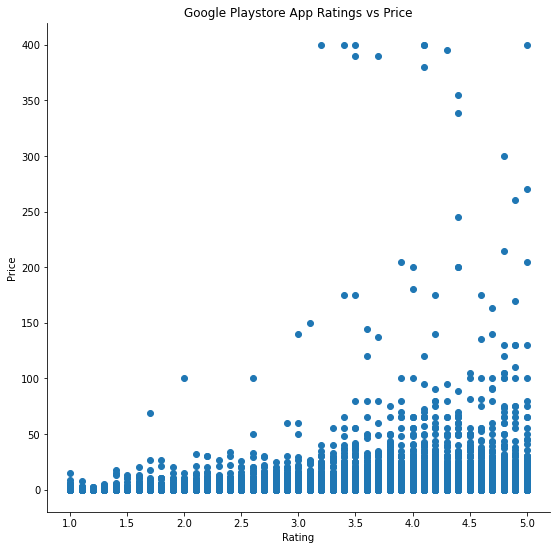

In [28]:
# create a figure and axis

rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.figsize'] = 9,9

fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(df['Rating'], df['Price'])

# set a title and labels
ax.set_title('Google Playstore App Ratings vs Price')
ax.set_xlabel('Rating')
ax.set_ylabel('Price')

In [29]:
# This code works but it takes a long time to finish. We will use Seaborn instead to produce the desired plot.

#colors = {'Everyone':'blue', 'Teen':'yellow', 'Mature 17+':'cyan', 'Everyone 10+':'magenta', 'Adults only 18+':'red', 'Unrated':'black'}

#fig, ax = plt.subplots()

#for i in range(len(df['Rating'])):
#    ax.scatter(df['Rating'][i], 
#               df['Price'][i],
#               color=colors[df['Content Rating'][i]])
    
#ax.set_title('Google Playstore App Ratings vs Price')
#ax.set_xlabel('Rating')
#ax.set_ylabel('Price')

In [100]:
np.corrcoef(df['Rating'], df['Price'])

array([[1.        , 0.00328058],
       [0.00328058, 1.        ]])

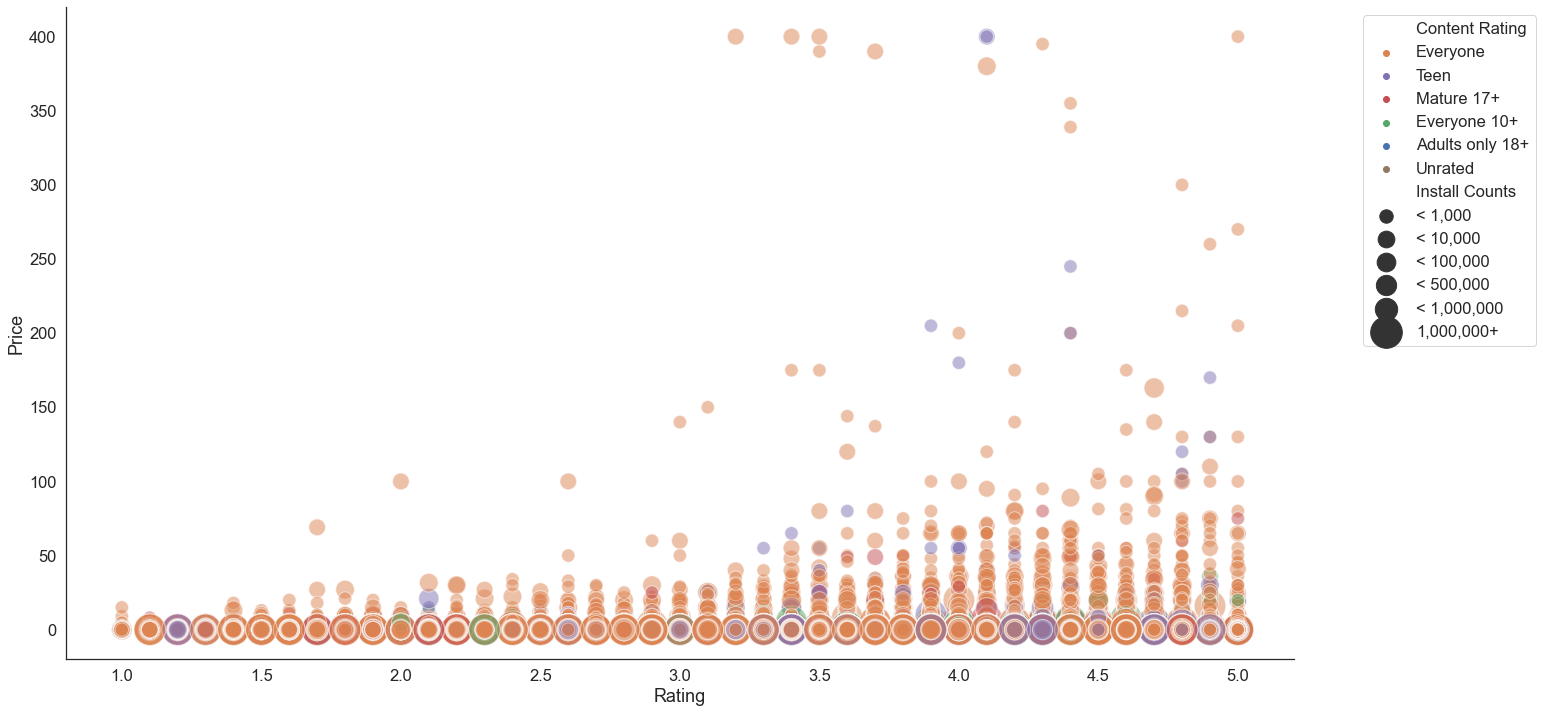

In [99]:
palette1 = {
    'Adults only 18+': '#4C72B0',
    'Everyone': '#DD8452',
    'Everyone 10+': '#55A868',
    'Mature 17+': '#C44E52',
    'Teen': '#8172B3',
    'Unrated': '#937860'
}

plt.figure(figsize = (22,12))
sns.set(style='white', font_scale = 1.5)
sns.scatterplot(x='Rating',
                    y='Price',
                    hue='Content Rating',
                    size='Install Counts',
                    sizes={'< 1,000':180,'< 10,000':280,'< 100,000':350,'< 500,000':410,'< 1,000,000':500,
                                               '1,000,000+':1000},
                    palette=palette1,
                    alpha=0.5,
                    data=df)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.legend(ncol=1,markerscale=1,bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

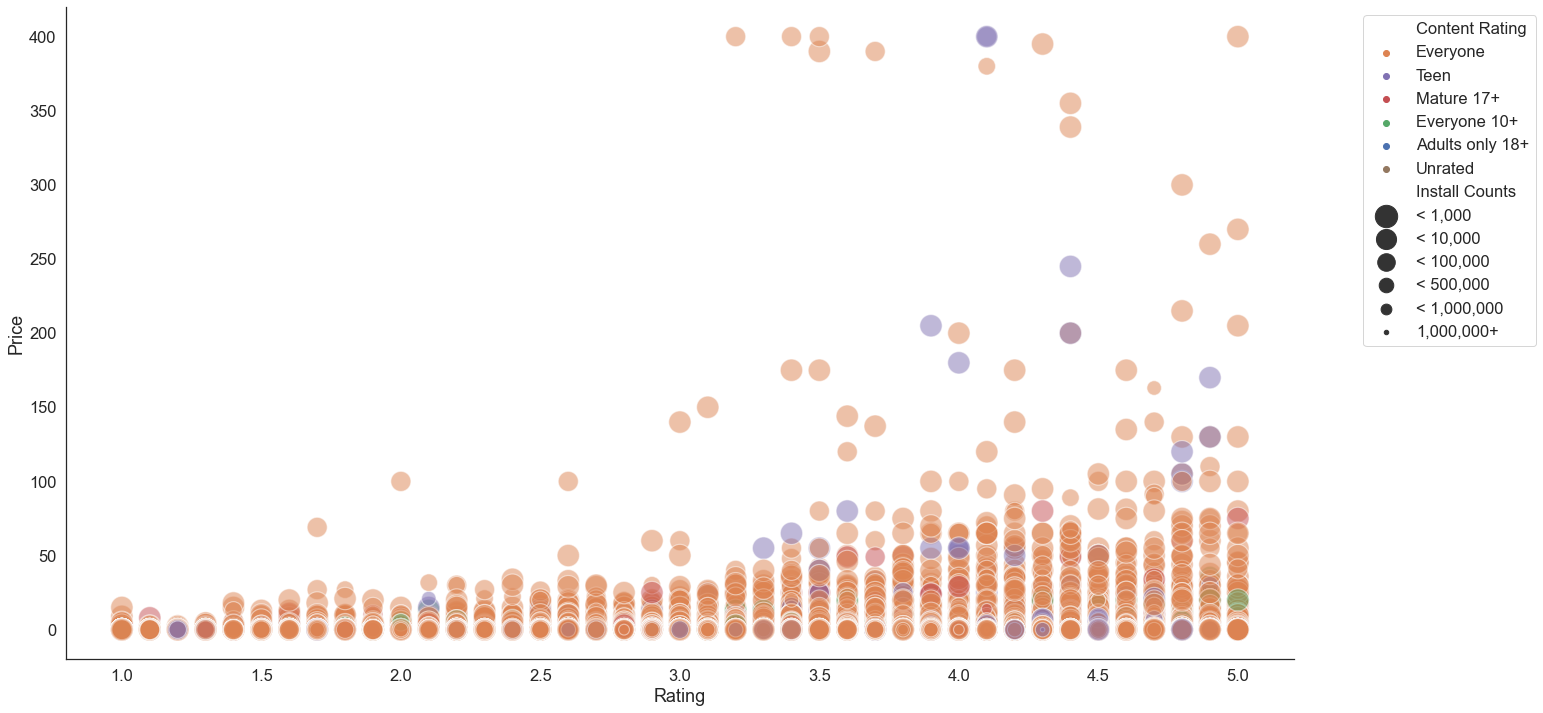

In [90]:
plt.figure(figsize = (22,12))
sns.set(style='white', font_scale = 1.5)
sns.scatterplot(x='Rating',
                    y='Price',
                    hue='Content Rating',
                    size='Install Counts',
                    sizes=(20,500),
                    palette=palette1,
                    alpha=0.5,
                    data=df)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.legend(ncol=1,markerscale=1,bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

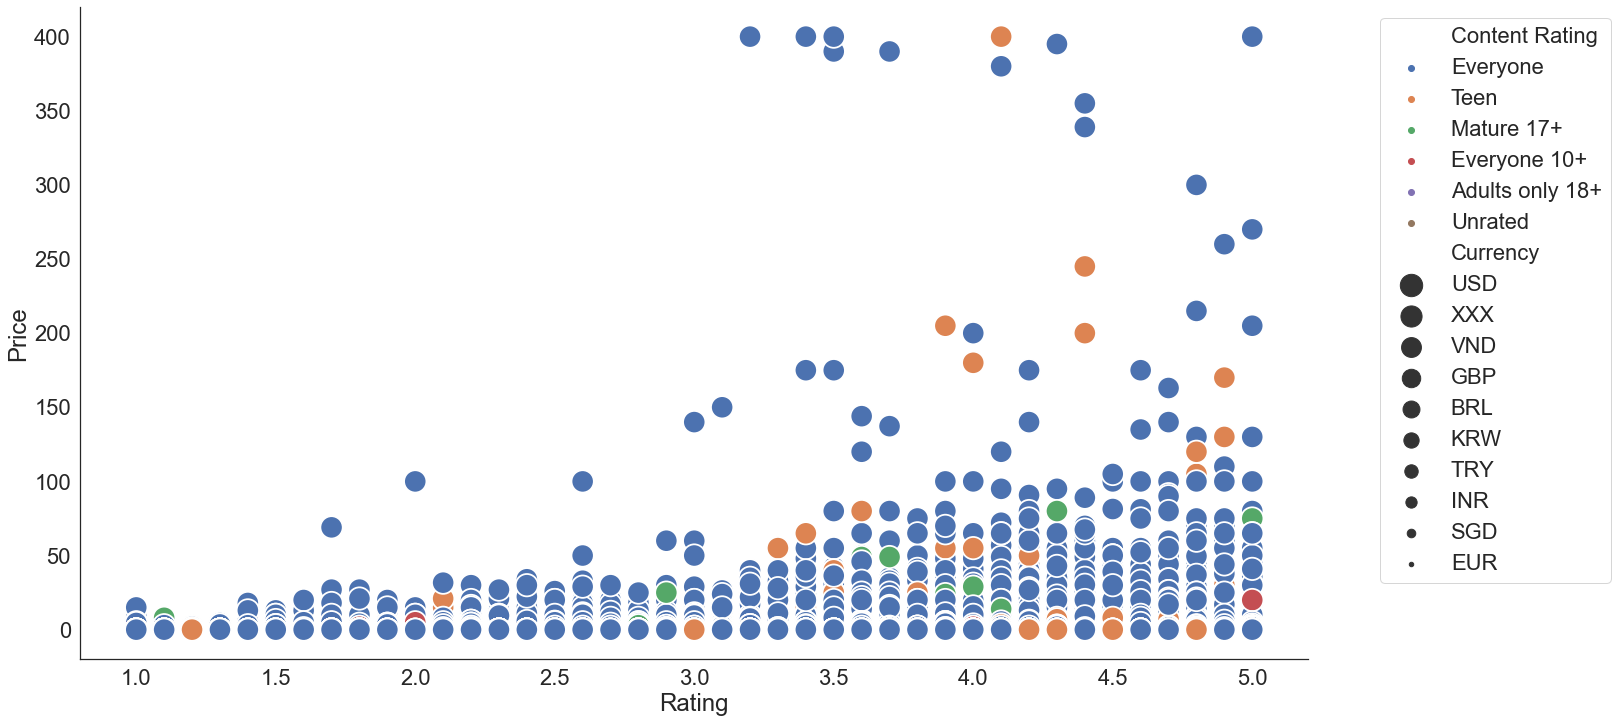

In [31]:
plt.figure(figsize = (22,12))
sns.set(style='white', font_scale = 2)
sns.scatterplot(x='Rating',
                    y='Price',
                    hue='Content Rating',
                    size='Currency',
                    sizes=(20,500),
                    data=df)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.legend(ncol=1,markerscale=1,bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

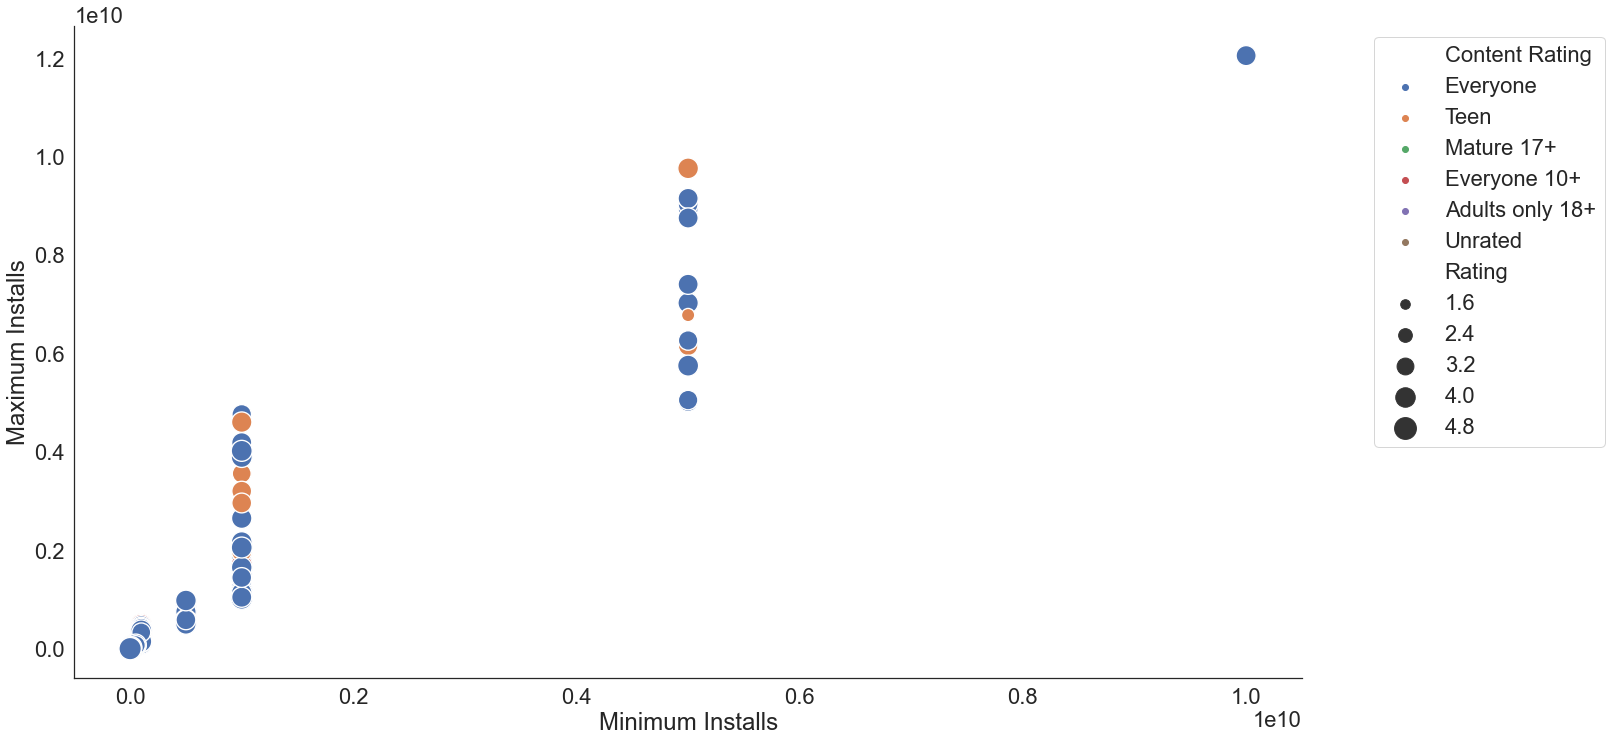

In [32]:
plt.figure(figsize = (22,12))
sns.set(style='white', font_scale = 2)
sns.scatterplot(x='Minimum Installs',
                    y='Maximum Installs',
                    hue='Content Rating',
                    size='Rating',
                    sizes=(20,500),
                    data=df)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.legend(ncol=1,markerscale=1,bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

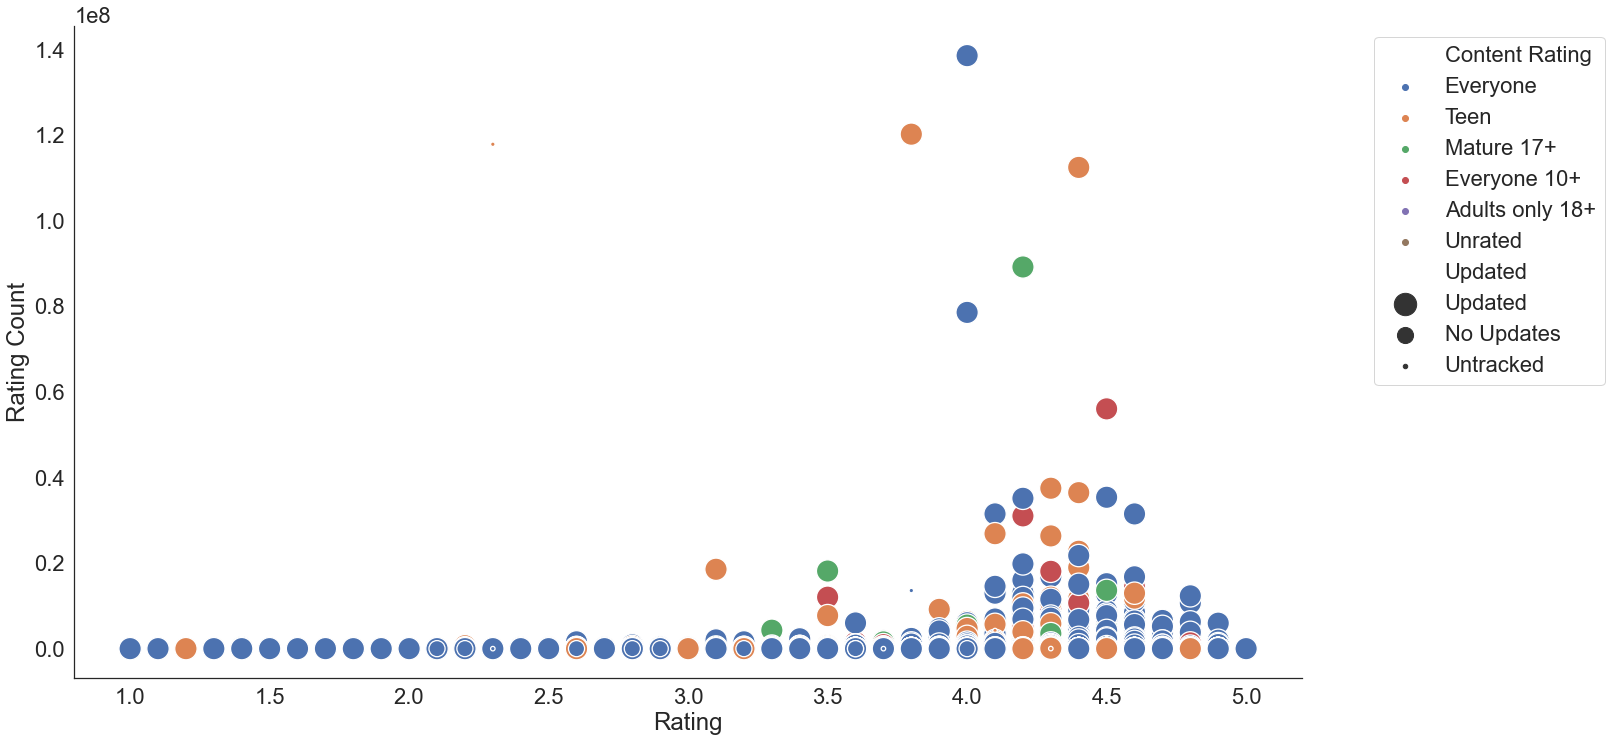

In [33]:
plt.figure(figsize = (22,12))
sns.set(style='white', font_scale = 2)
sns.scatterplot(x='Rating',
                    y='Rating Count',
                    hue='Content Rating',
                    size='Updated',
                    sizes=(20,500),
                    data=df)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.legend(ncol=1,markerscale=1,bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

*Scatterplot with Facet Configuration*

I noticed that having everything in one plot does not provide good insight so I split them up based on content.

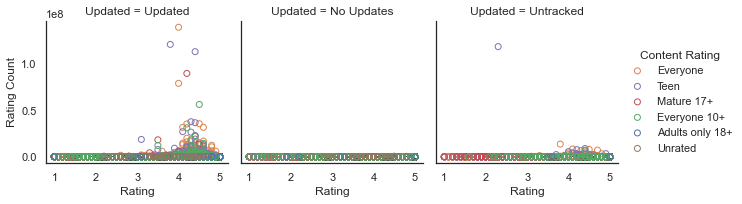

In [34]:
palette1 = {
    'Adults only 18+': '#4C72B0',
    'Everyone': '#DD8452',
    'Everyone 10+': '#55A868',
    'Mature 17+': '#C44E52',
    'Teen': '#8172B3',
    'Unrated': '#937860'
}

sns.set(style='white', font_scale = 1)
g = sns.FacetGrid(df, col='Updated',hue='Content Rating', palette = palette1)
g.map(plt.scatter, 'Rating', 'Rating Count', fc="none")
g.add_legend()

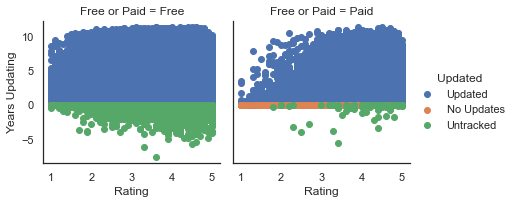

In [35]:
sns.set(style='white', font_scale = 1)
g = sns.FacetGrid(df, col='Free or Paid',hue='Updated')
g.map(plt.scatter, 'Rating', 'Years Updating')
g.add_legend()

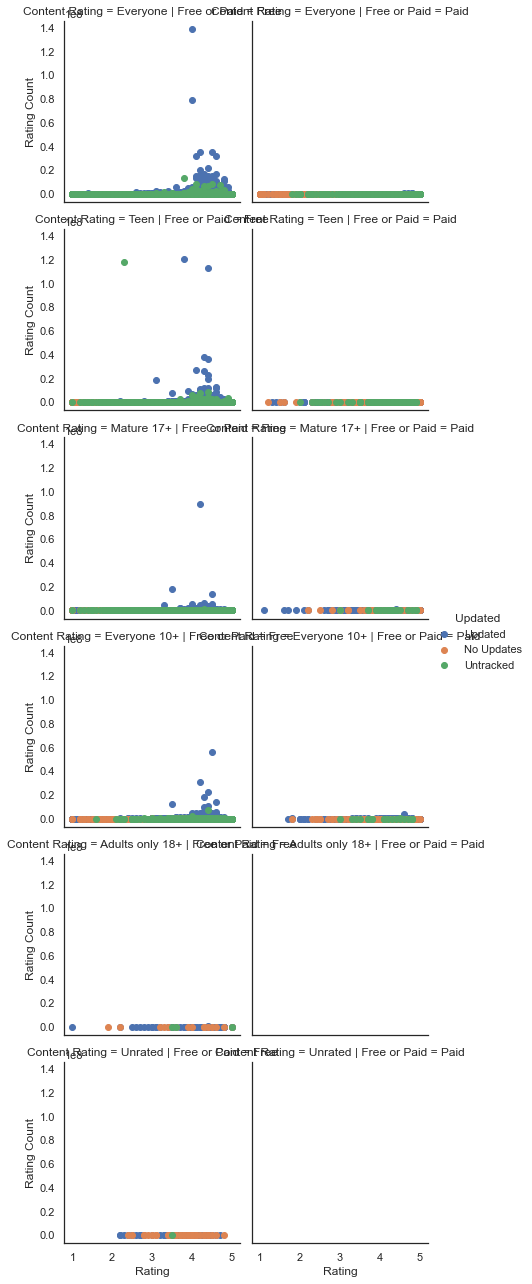

In [36]:
sns.set(style='white', font_scale = 1)
g = sns.FacetGrid(df, row='Content Rating', col='Free or Paid',hue='Updated')
g.map(plt.scatter, 'Rating', 'Rating Count')
g.add_legend()

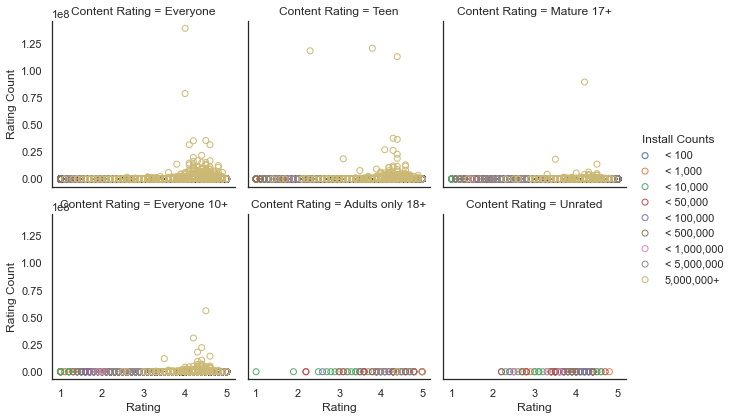

In [72]:
sns.set(style='white', font_scale = 1)
g = sns.FacetGrid(df, col='Content Rating',hue='Install Counts',col_wrap=3)
g.map(plt.scatter, 'Rating', 'Rating Count', fc="none")
g.add_legend()

### Bars and Histograms

I added broken lines in order to see clearly certain aspects of data:

1. As will be seen, most are near the 4-star rating. Hence, I placed in a horizontal line at 4-stars.
2. For counts and frequencies, I took the value of 25% of the datapoint count. For example, if I have two bars crossing that line, it means that at least 50% of the datapoints are on those criteria.

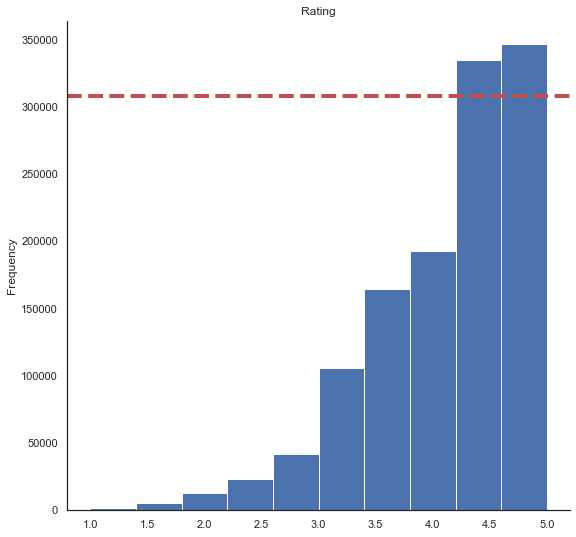

In [38]:
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

df['Rating'].plot.hist(title='Rating')
plt.axhline(y=len(df.index)/4, color='r', linestyle='--', linewidth=4) # marks when the count reaches 25% of the dataset
plt.show()

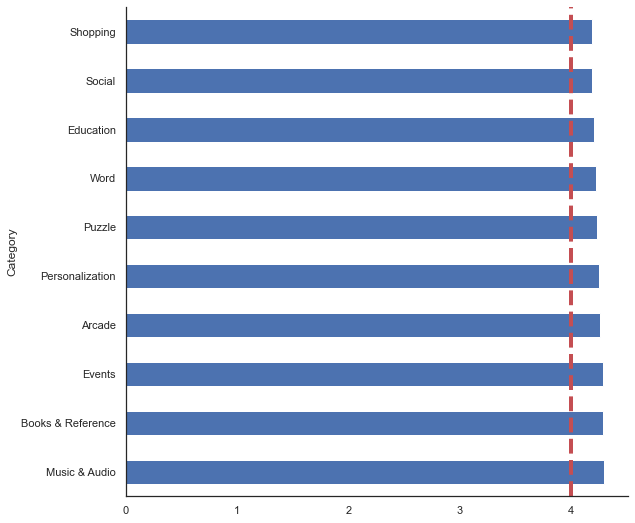

In [39]:
df.groupby('Category').Rating.mean().sort_values(ascending=False)[:10].plot.barh()
plt.axvline(x=4, color='r', linestyle='--', linewidth=4)
plt.show()

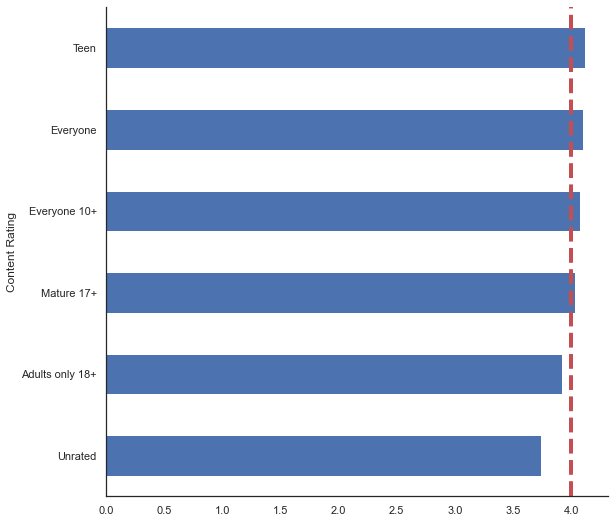

In [40]:
df.groupby('Content Rating').Rating.mean().sort_values(ascending=True).plot.barh()
plt.axvline(x=4, color='r', linestyle='--', linewidth=4)
plt.show()

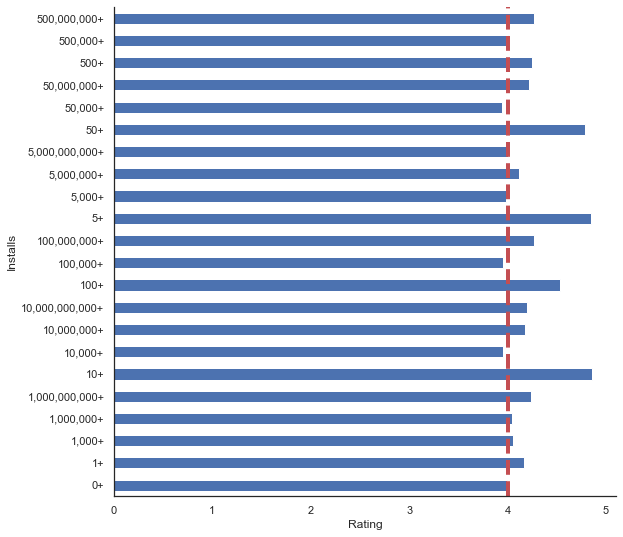

In [41]:
df.groupby('Installs').Rating.mean().plot.barh()
plt.axvline(x=4, color='r', linestyle='--', linewidth=4)
plt.xlabel('Rating')
plt.show()

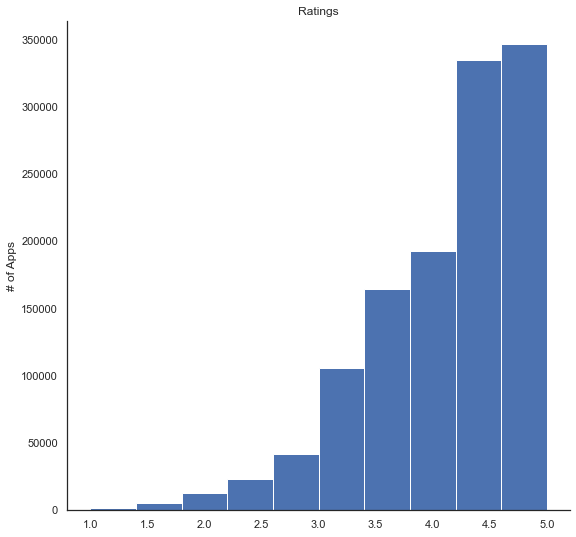

In [42]:
df['Rating'].plot.hist(title='Ratings')
plt.ylabel('# of Apps')
plt.show()

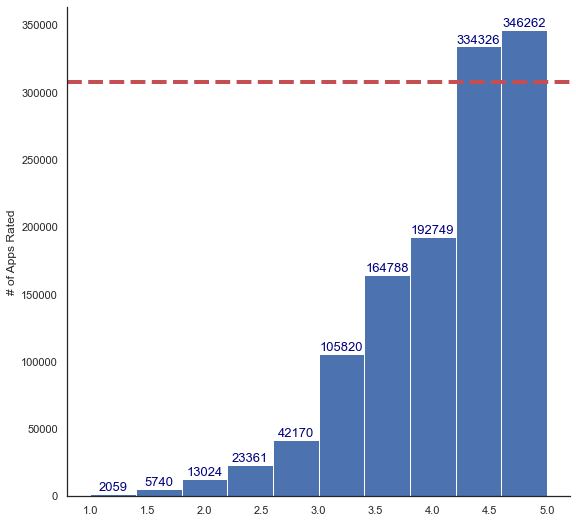

In [43]:
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

values, bins, bars = plt.hist(df['Rating'])
plt.bar_label(bars, fontsize=13, color='navy')
plt.ylabel("# of Apps Rated", loc="center")

plt.axhline(y=len(df.index)/4, color='r', linestyle='--', linewidth=4) # marks when the count reaches 25% of the dataset
plt.show()

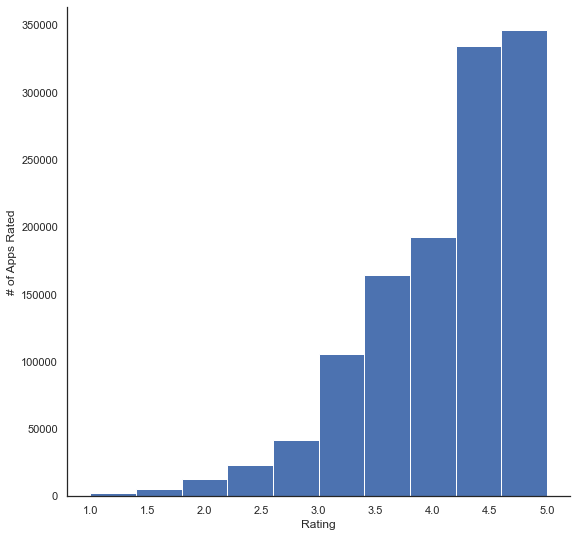

In [44]:
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

ax = sns.histplot(x='Rating', data=df, bins=10, color='#4C72B0', alpha = 1)
plt.ylabel("# of Apps Rated", loc="center")
plt.show()

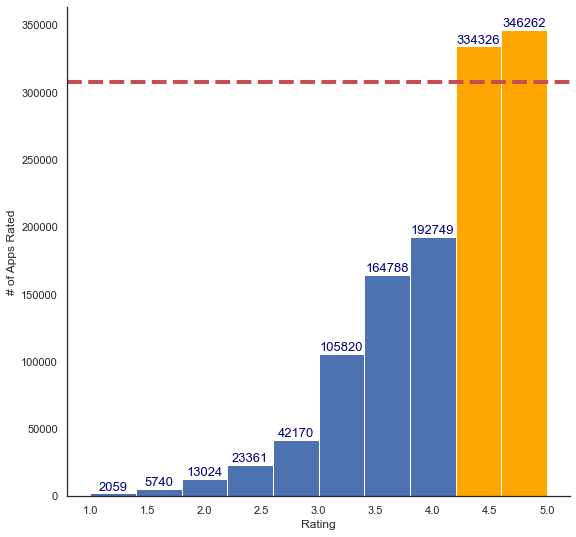

In [45]:
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

ax = sns.histplot(x='Rating', data=df, bins=10, color='#4C72B0', alpha = 1)
ax.patches[8].set_facecolor('orange')
ax.patches[9].set_facecolor('orange')

plt.bar_label(bars, fontsize=13, color='navy')
plt.ylabel("# of Apps Rated", loc="center")

plt.axhline(y=len(df.index)/4, color='r', linestyle='--', linewidth=4) # marks when the count reaches 25% of the dataset
plt.show()

In [46]:
#rcParams['axes.spines.top'] = False
#rcParams['axes.spines.right'] = False

#ax = sns.barplot(x='Category Rating', y='Rating Count', data=df, color ='#4C72B0')
#plt.ylabel("# of Apps Rated", loc="center")
#plt.show()

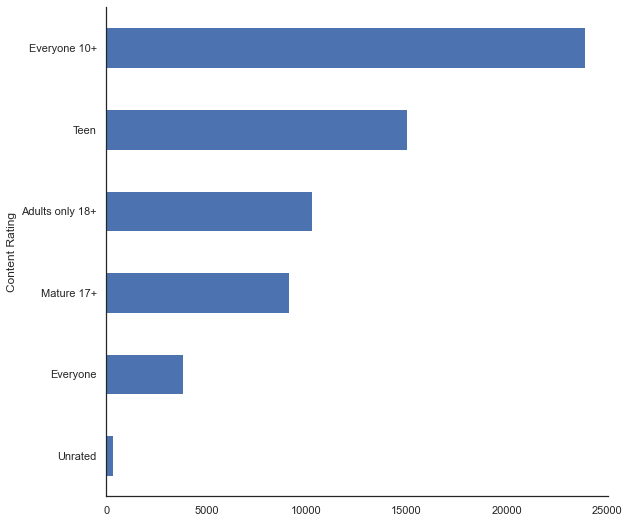

In [47]:
df.groupby('Content Rating')['Rating Count'].mean().sort_values(ascending=True).plot.barh()
#plt.axvline(x=4, color='r', linestyle='--', linewidth=4)
plt.show()

### Bonus Plots

Surprisingly, I will be using some for the insights.

<AxesSubplot:xlabel='Free or Paid', ylabel='Rating'>

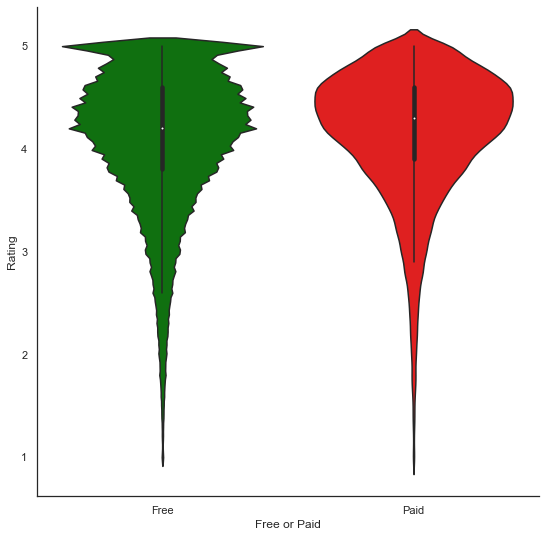

In [48]:
sns.violinplot('Free or Paid', 'Rating', data=df, palette=['green', 'red'])

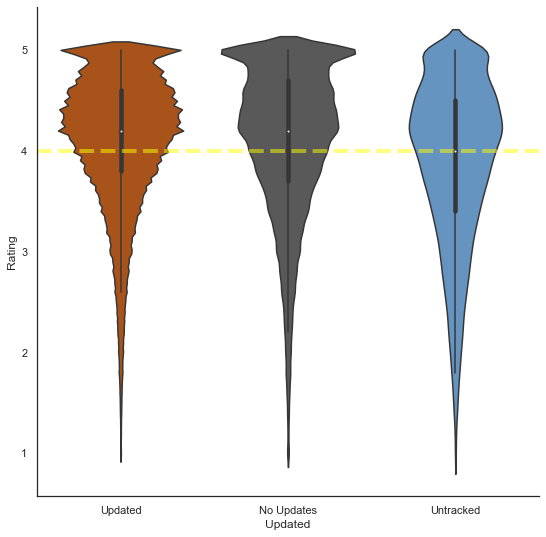

In [49]:
sns.violinplot('Updated', 'Rating', data=df, palette = ['xkcd:burnt orange',(0.35, 0.35, 0.35), '#5595ce'])
plt.axhline(y=4, color='yellow', linestyle='--', linewidth=4, alpha=0.5)
plt.show()

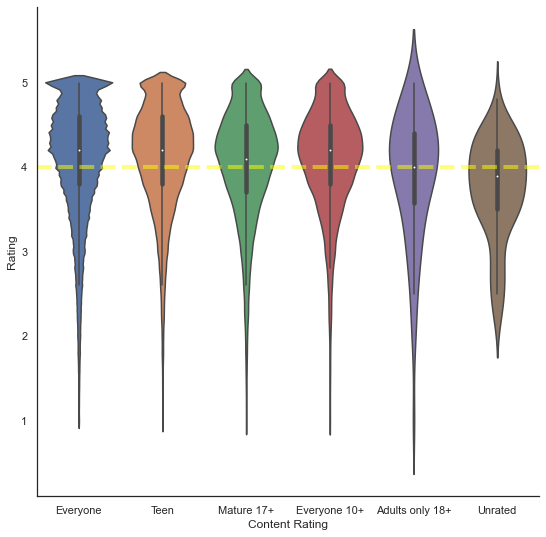

In [50]:
sns.violinplot('Content Rating', 'Rating', data=df, palette= ['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B3','#937860'])
plt.axhline(y=4, color='yellow', linestyle='--', linewidth=4, alpha=0.5)
plt.show()

In [51]:
#sns.swarmplot(x='Content Rating', y='Rating', data=df) not included for now because it is taking too long to generate

**Factor Plot on Category**

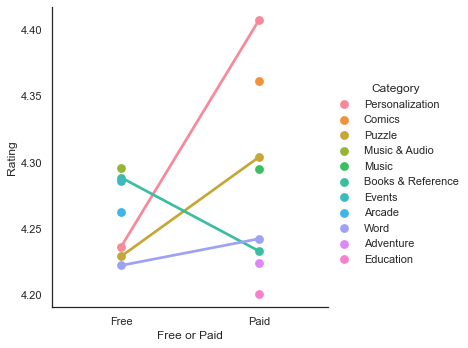

In [52]:
df_fp_ct = df.groupby(['Free or Paid','Category'])['Rating'].mean('Rating').sort_values(ascending=False)[:15].reset_index()
sns.factorplot(data=df_fp_ct, 
               x = 'Free or Paid', 
               y = 'Rating', 
               hue = 'Category')

**Factor Plot on Content Rating**

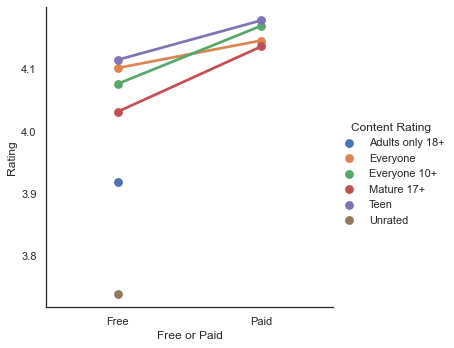

In [53]:
# revise to match color palette in violin plot
palette = ['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B3','#937860']

df_fp_cr = df.groupby(['Free or Paid','Content Rating'])['Rating'].mean('Rating').reset_index()
sns.factorplot(data=df_fp_cr, 
               x = 'Free or Paid', 
               y = 'Rating', 
               hue = 'Content Rating',
               palette = palette)

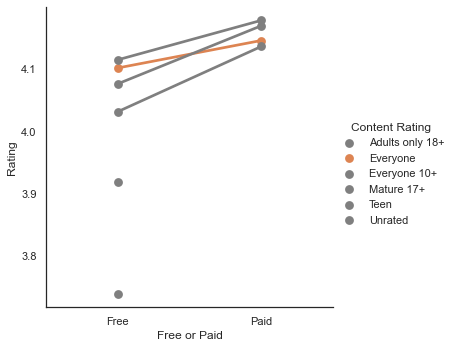

In [54]:
# only Everyone with color

palette1 = {
    'Adults only 18+': 'tab:gray',
    'Everyone': '#DD8452',
    'Everyone 10+': 'tab:gray',
    'Mature 17+': 'tab:gray',
    'Teen': 'tab:gray',
    'Unrated': 'tab:gray'
}

df_fp_cr = df.groupby(['Free or Paid','Content Rating'])['Rating'].mean('Rating').reset_index()
sns.factorplot(data=df_fp_cr, 
               x = 'Free or Paid', 
               y = 'Rating', 
               hue = 'Content Rating',
               palette = palette1)

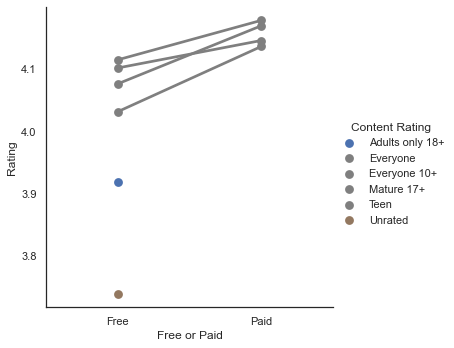

In [55]:
# only Adults only 18+ and Unrated with color

palette2 = {
    'Adults only 18+': '#4C72B0',
    'Everyone': 'tab:gray',
    'Everyone 10+': 'tab:gray',
    'Mature 17+': 'tab:gray',
    'Teen': 'tab:gray',
    'Unrated': '#937860'
}

df_fp_cr = df.groupby(['Free or Paid','Content Rating'])['Rating'].mean('Rating').reset_index()
sns.factorplot(data=df_fp_cr, 
               x = 'Free or Paid', 
               y = 'Rating', 
               hue = 'Content Rating',
               palette = palette2)

## Data Insights (from Storytelling Deck)

| Item # | Insights |
|:--- |:--- |
| 1 | At least 50% of released apps are above 4.5 stars |
| 2 | Ratings have low correlation whether the app is free or not |
| 3 | Teen category apps might be worth the gamble |
| 4 | Paid versions have higher rating impact than the Free |
| 5 | Adults only 18+ and Unrated do not have paid apps |
| 6 | Everyone not as significant |


## Data Insights (Original)

| Nature | Insights |
|:--- |:--- |
| MatPlotLib vs Seaborn Implementation | For this exercise, I used seaborn over matplotlib when creating the scatterplot with colors. Matplotlib takes too long to produce the plot while Seaborn takes only a few minutes. It is noteworthy that Seaborn reminds me of ggplot in R, since my background is on creating different plots on R Studio in my current company. |
| User Ratings | Many users (at least 50%) tend to rate apps between 4.5 to 5 star rating in general. <br> 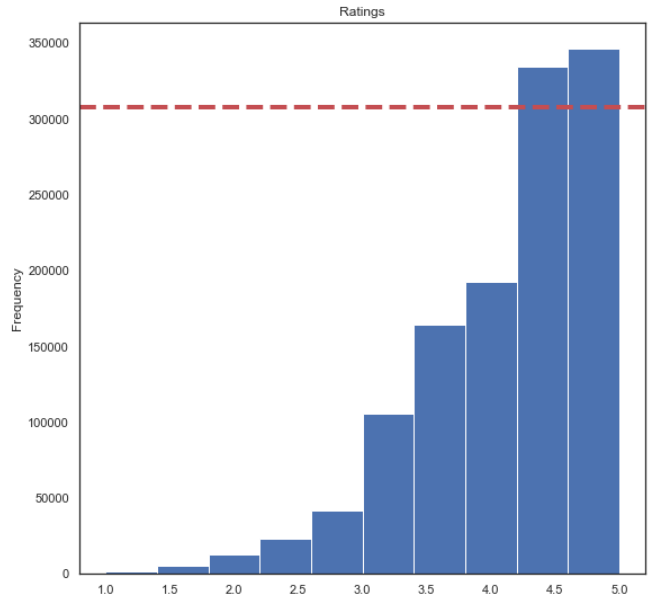|
| Installs | Apps with installs of approximately 5+ to 50+ have higher rating. These niche apps are probably appreciated by the few who needs to use them. If we are to target higher sales, we might consider having them as paid apps or increase their price if they are already paid type. <br>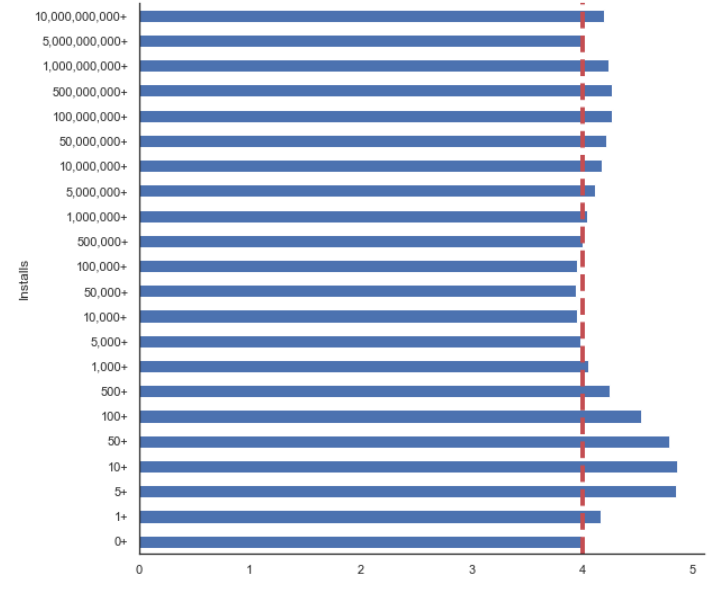|
| Content Rating and Installs | Installs ranging from 50m+ are usually free so they are found on the x-axis. Most of the Content Ratings have ratings on the 4 star side while having installations of 50+ to 50k+. <br><br> As expected, with higher prices leads to relatively fewer downloads. 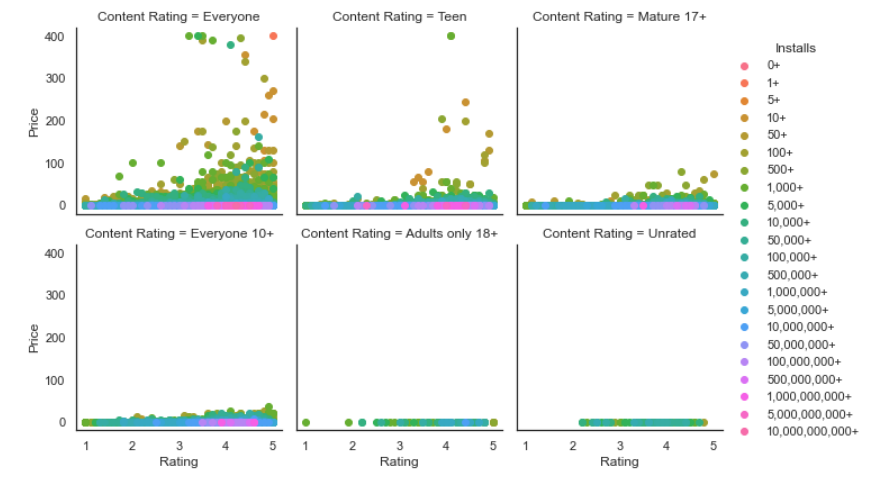|
| Content Rating (Violin Plot) | While it looks like the ratings of diffenet contents are near 4 stars, only four types are above 4 stars on the average. These are `Teen`, `Everyone`, `Everyone 10+` and `Mature 17+`. <br><br> Based on their distribution, most of the apps from `Everyone` and `Teen` are likely above the 4-star rating. While `Adults only 18+` and `Unrated` are likely spread out from at least the 3.5 star rating. 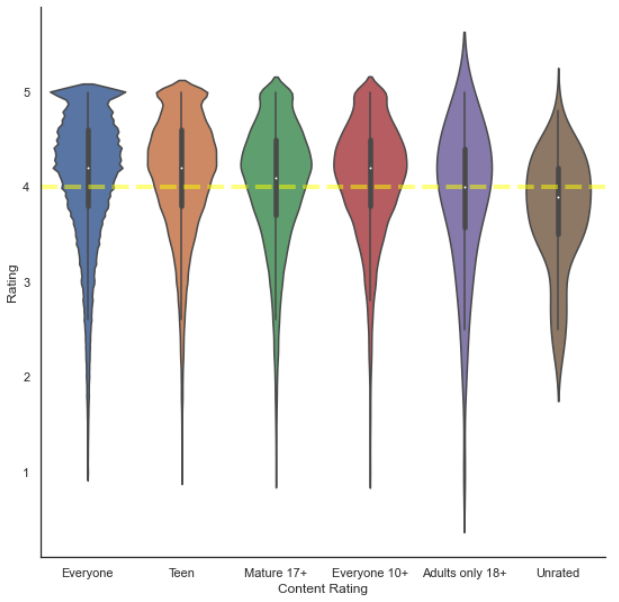|
| `Free or Paid` Factor Plot | From the plot we can see that `Teen`, `Everyone 10+` and `Mature 17+` have significant higher ratings shifting from Free to Paid. However, for `Everyone` content rating, the impact is not as pronouced. Propose to have a further look at this genre to see whether what factors and help Paid versions do better. `Adults only 18+` and `Unrated` apps do not have Paid versions and are rated below 4 stars. <br> 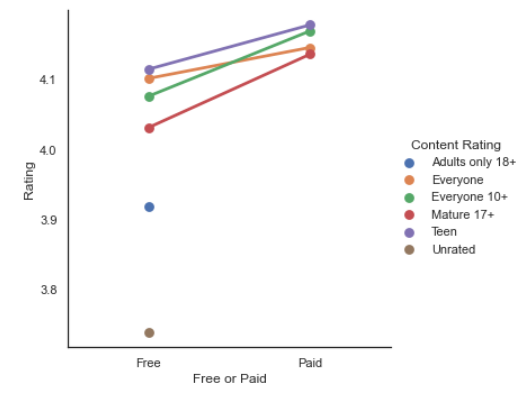|